In [1]:
import pandas as pd
import re
import datetime
import csv

In [2]:
base1000_df = pd.read_csv('data/accre-jobs-2020.csv', nrows=1000)
base1000_df.shape

(1000, 13)

In [3]:
base1000_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JOBID      1000 non-null   object
 1   ACCOUNT    1000 non-null   object
 2   USER       1000 non-null   object
 3   REQMEM     1000 non-null   object
 4   USEDMEM    1000 non-null   object
 5   REQTIME    1000 non-null   object
 6   USEDTIME   1000 non-null   object
 7   NODES      1000 non-null   int64 
 8   CPUS       1000 non-null   int64 
 9   PARTITION  1000 non-null   object
 10  EXITCODE   1000 non-null   object
 11  STATE      1000 non-null   object
 12  NODELIST   1000 non-null   object
dtypes: int64(2), object(11)
memory usage: 101.7+ KB


In [4]:
base1000_df = base1000_df[base1000_df['PARTITION']=='production']

In [5]:
#base1000_df = base1000_df[base1000_df['EXITCODE']=='0:0']

In [6]:
base1000_df['HHMMSS_USED'] = base1000_df['USEDTIME'].str.extract('(\d{2}:\d{2}:\d{2})')

In [7]:
base1000_df['DAYS_USED'] = base1000_df['USEDTIME'].str.extract('(\d+)-')

In [8]:
base1000_df['DAYS_USED'] = base1000_df['DAYS_USED'].fillna(0)

In [9]:
base1000_df['DAYS_USED'] = base1000_df['DAYS_USED'].astype(int)

In [10]:
base1000_df['HH_USED'] = base1000_df['HHMMSS_USED'].str.extract('(\d+):')
base1000_df['MM_USED'] = base1000_df['HHMMSS_USED'].str.extract(':(\d+):')
base1000_df['SS_USED'] = base1000_df['HHMMSS_USED'].str.extract(':\d+:(\d+)')

In [11]:
base1000_df['HH_USED'] = base1000_df['HH_USED'].astype(int)
base1000_df['MM_USED'] = base1000_df['MM_USED'].astype(int)
base1000_df['SS_USED'] = base1000_df['SS_USED'].astype(int)

In [12]:
day_sec = base1000_df['DAYS_USED'] * 24 * 60 * 60
hour_sec = base1000_df['HH_USED']*3600
minute_sec = base1000_df['MM_USED']*60

In [13]:
base1000_df['TOTAL_SEC_USED'] = day_sec + hour_sec + minute_sec + base1000_df['SS_USED']

In [14]:
base1000_df['HHMMSS_REQ'] = base1000_df['REQTIME'].str.extract('(\d{2}:\d{2}:\d{2})')
base1000_df['DAYS_REQ'] = base1000_df['REQTIME'].str.extract('(\d+)-')

In [15]:
base1000_df['HH_REQ'] = base1000_df['HHMMSS_REQ'].str.extract('(\d+):')
base1000_df['MM_REQ'] = base1000_df['HHMMSS_REQ'].str.extract(':(\d+):')
base1000_df['SS_REQ'] = base1000_df['HHMMSS_REQ'].str.extract(':\d+:(\d+)')

In [16]:
base1000_df['HH_REQ'] = base1000_df['HH_REQ'].astype(int)
base1000_df['MM_REQ'] = base1000_df['MM_REQ'].astype(int)
base1000_df['SS_REQ'] = base1000_df['SS_REQ'].astype(int)
base1000_df['DAYS_REQ'] = base1000_df['DAYS_REQ'].fillna(0).astype(int)

In [17]:
day_secr = base1000_df['DAYS_REQ'] * 24 * 60 * 60
hour_secr = base1000_df['HH_REQ']*3600
minute_secr = base1000_df['MM_REQ']*60

In [18]:
base1000_df['TOTAL_SEC_REQ'] = day_secr + hour_secr + minute_secr + base1000_df['SS_REQ']

In [19]:
base1000_df = base1000_df.drop(columns=['HHMMSS_REQ', 'DAYS_REQ', 'HH_REQ', 'MM_REQ', 'SS_REQ', 'SS_USED','HHMMSS_USED', 'DAYS_USED', 'HH_USED', 'MM_USED' ,'SS_USED'])

In [20]:
base1000_df

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,TOTAL_SEC_USED,TOTAL_SEC_REQ
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,1188028,1188000
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,1090256,1188000
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,1188020,1188000
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,1050632,1188000
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,1188003,1188000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17016721_16,sunburst,darlyne,8192Mn,2547.97M,14-00:00:00,7-17:16:46,1,1,production,0:0,COMPLETED,cn322,667006,1209600
996,17016721_17,sunburst,darlyne,8192Mn,1950.11M,14-00:00:00,7-03:03:50,1,1,production,0:0,COMPLETED,cn322,615830,1209600
997,17016721_18,sunburst,darlyne,8192Mn,2450.23M,14-00:00:00,7-09:59:09,1,1,production,0:0,COMPLETED,cn322,640749,1209600
998,17016721_19,sunburst,darlyne,8192Mn,2743.43M,14-00:00:00,7-12:40:23,1,1,production,0:0,COMPLETED,cn322,650423,1209600




While we have systematic checks in place to ensure the general system health of each compute node, we would like to use long-term data to see if there are any clusters of job failures on specific nodes. Do any of the production partition nodes show an unusual number of failed jobs relative to the others? Ignore the debug partition for this question.


First I wanted to pull in the full CSV file and apply some of the above cleaning.

In [21]:
full_df = pd.read_csv('data/accre-jobs-2020.csv', error_bad_lines=False)

b'Skipping line 3461: expected 13 fields, saw 15\nSkipping line 3462: expected 13 fields, saw 16\nSkipping line 3465: expected 13 fields, saw 15\nSkipping line 3468: expected 13 fields, saw 16\nSkipping line 3472: expected 13 fields, saw 15\nSkipping line 3476: expected 13 fields, saw 16\nSkipping line 3479: expected 13 fields, saw 14\nSkipping line 3482: expected 13 fields, saw 14\nSkipping line 3486: expected 13 fields, saw 14\nSkipping line 3490: expected 13 fields, saw 14\nSkipping line 3494: expected 13 fields, saw 14\nSkipping line 3495: expected 13 fields, saw 16\nSkipping line 3497: expected 13 fields, saw 14\nSkipping line 3498: expected 13 fields, saw 14\nSkipping line 3499: expected 13 fields, saw 14\nSkipping line 3505: expected 13 fields, saw 14\nSkipping line 3517: expected 13 fields, saw 16\nSkipping line 3526: expected 13 fields, saw 15\nSkipping line 3528: expected 13 fields, saw 15\nSkipping line 3529: expected 13 fields, saw 15\nSkipping line 3530: expected 13 fields

b'Skipping line 396605: expected 13 fields, saw 14\nSkipping line 397416: expected 13 fields, saw 14\nSkipping line 398947: expected 13 fields, saw 14\nSkipping line 402958: expected 13 fields, saw 14\nSkipping line 410134: expected 13 fields, saw 14\nSkipping line 410135: expected 13 fields, saw 14\nSkipping line 410136: expected 13 fields, saw 14\nSkipping line 410137: expected 13 fields, saw 14\nSkipping line 410140: expected 13 fields, saw 14\nSkipping line 410165: expected 13 fields, saw 14\nSkipping line 410166: expected 13 fields, saw 14\nSkipping line 410168: expected 13 fields, saw 14\nSkipping line 410169: expected 13 fields, saw 14\nSkipping line 410170: expected 13 fields, saw 14\nSkipping line 410171: expected 13 fields, saw 14\nSkipping line 410172: expected 13 fields, saw 14\nSkipping line 410173: expected 13 fields, saw 14\nSkipping line 410174: expected 13 fields, saw 14\nSkipping line 410175: expected 13 fields, saw 16\nSkipping line 410176: expected 13 fields, saw 16

b'Skipping line 737407: expected 13 fields, saw 16\nSkipping line 753640: expected 13 fields, saw 14\nSkipping line 755322: expected 13 fields, saw 16\nSkipping line 773545: expected 13 fields, saw 15\nSkipping line 775580: expected 13 fields, saw 16\nSkipping line 775822: expected 13 fields, saw 56\nSkipping line 776044: expected 13 fields, saw 57\nSkipping line 776410: expected 13 fields, saw 16\nSkipping line 776465: expected 13 fields, saw 18\nSkipping line 777411: expected 13 fields, saw 14\nSkipping line 778897: expected 13 fields, saw 14\nSkipping line 778909: expected 13 fields, saw 14\nSkipping line 779030: expected 13 fields, saw 14\nSkipping line 779044: expected 13 fields, saw 14\nSkipping line 779162: expected 13 fields, saw 14\nSkipping line 783281: expected 13 fields, saw 14\nSkipping line 783282: expected 13 fields, saw 14\nSkipping line 783283: expected 13 fields, saw 14\nSkipping line 783284: expected 13 fields, saw 14\nSkipping line 783285: expected 13 fields, saw 14

b'Skipping line 919450: expected 14 fields, saw 16\nSkipping line 919451: expected 14 fields, saw 16\nSkipping line 919453: expected 14 fields, saw 15\nSkipping line 919454: expected 14 fields, saw 15\nSkipping line 919459: expected 14 fields, saw 16\nSkipping line 919462: expected 14 fields, saw 16\nSkipping line 919599: expected 14 fields, saw 16\nSkipping line 919601: expected 14 fields, saw 16\nSkipping line 936638: expected 14 fields, saw 16\nSkipping line 941490: expected 14 fields, saw 15\nSkipping line 941493: expected 14 fields, saw 15\nSkipping line 941494: expected 14 fields, saw 15\nSkipping line 941495: expected 14 fields, saw 16\nSkipping line 941496: expected 14 fields, saw 16\nSkipping line 941497: expected 14 fields, saw 16\nSkipping line 941499: expected 14 fields, saw 16\nSkipping line 941500: expected 14 fields, saw 16\nSkipping line 941501: expected 14 fields, saw 15\nSkipping line 941502: expected 14 fields, saw 16\nSkipping line 941509: expected 14 fields, saw 15

b'Skipping line 2081253: expected 14 fields, saw 15\nSkipping line 2083750: expected 14 fields, saw 16\nSkipping line 2095351: expected 14 fields, saw 16\nSkipping line 2095354: expected 14 fields, saw 16\nSkipping line 2095356: expected 14 fields, saw 16\nSkipping line 2095401: expected 14 fields, saw 16\nSkipping line 2095403: expected 14 fields, saw 16\nSkipping line 2095404: expected 14 fields, saw 16\nSkipping line 2095406: expected 14 fields, saw 16\nSkipping line 2095416: expected 14 fields, saw 16\nSkipping line 2097562: expected 14 fields, saw 15\nSkipping line 2097577: expected 14 fields, saw 15\nSkipping line 2097591: expected 14 fields, saw 15\nSkipping line 2097607: expected 14 fields, saw 15\nSkipping line 2097823: expected 14 fields, saw 16\nSkipping line 2098977: expected 14 fields, saw 16\nSkipping line 2098985: expected 14 fields, saw 16\n'
b'Skipping line 2102014: expected 14 fields, saw 16\nSkipping line 2111069: expected 14 fields, saw 16\nSkipping line 2111070: ex

b'Skipping line 2315585: expected 14 fields, saw 15\nSkipping line 2315586: expected 14 fields, saw 16\nSkipping line 2315590: expected 14 fields, saw 15\nSkipping line 2320415: expected 14 fields, saw 17\nSkipping line 2320416: expected 14 fields, saw 16\nSkipping line 2320417: expected 14 fields, saw 16\nSkipping line 2320418: expected 14 fields, saw 17\nSkipping line 2320419: expected 14 fields, saw 17\nSkipping line 2320420: expected 14 fields, saw 16\nSkipping line 2320421: expected 14 fields, saw 16\nSkipping line 2320422: expected 14 fields, saw 16\nSkipping line 2320423: expected 14 fields, saw 15\nSkipping line 2320424: expected 14 fields, saw 17\nSkipping line 2320425: expected 14 fields, saw 17\nSkipping line 2320426: expected 14 fields, saw 15\nSkipping line 2320427: expected 14 fields, saw 15\nSkipping line 2320428: expected 14 fields, saw 17\nSkipping line 2320429: expected 14 fields, saw 17\nSkipping line 2320430: expected 14 fields, saw 17\nSkipping line 2320431: expect

b'Skipping line 2757408: expected 14 fields, saw 15\nSkipping line 2757409: expected 14 fields, saw 19\nSkipping line 2757417: expected 14 fields, saw 26\nSkipping line 2757419: expected 14 fields, saw 21\nSkipping line 2757420: expected 14 fields, saw 17\nSkipping line 2757423: expected 14 fields, saw 16\nSkipping line 2757424: expected 14 fields, saw 20\nSkipping line 2757425: expected 14 fields, saw 20\nSkipping line 2757428: expected 14 fields, saw 19\nSkipping line 2757429: expected 14 fields, saw 18\nSkipping line 2768275: expected 14 fields, saw 15\nSkipping line 2778028: expected 14 fields, saw 15\nSkipping line 2778763: expected 14 fields, saw 16\nSkipping line 2781196: expected 14 fields, saw 93\nSkipping line 2781541: expected 14 fields, saw 90\nSkipping line 2801366: expected 14 fields, saw 27\nSkipping line 2820401: expected 14 fields, saw 48\n'
b'Skipping line 2847140: expected 14 fields, saw 15\nSkipping line 2860040: expected 14 fields, saw 17\nSkipping line 2860041: ex

In [22]:
full_df = full_df[full_df['PARTITION']=='production']
full_df['REQMEM_IDEN'] = full_df['REQMEM'].str.extract('\d+(\w+)')
full_df['REQMEM_NUM'] = full_df['REQMEM'].str.extract('(\d+)\w+')
full_df['USEDMEM_NUM'] = full_df['USEDMEM'].str.extract('(\d+\.*\d*)\w+')

Unlike the other jobs, I wanted only failed jobs so that I could find the problem nodes.

In [23]:
failed_jobs = full_df[full_df['EXITCODE']!='0:0']

I then wanted to create a data frame where we had only the name of the node and the number of times it had a failure (which is what node_failure_df is)

In [24]:
node_failure_counts = failed_jobs['NODELIST'].value_counts()

In [25]:
node_failure_df = pd.DataFrame(node_failure_counts)

In [26]:
node_failure_df = node_failure_df.reset_index()

In [27]:
node_failure_df.columns = ['NODELIST','FAIL_COUNT']

In [28]:
problem_nodes = node_failure_df[node_failure_df['FAIL_COUNT']>4]
problem_nodes
#i chose 4 because about 27 nodes had 4 failures while only 11 had five, so that seemed a good cut off point. i found this using a .value_counts on problem_node['FAIL_COUNT']

,NODELIST,FAIL_COUNT
0,cn1449,16
1,cn1347,15
2,cn416,15
3,cn304,14
4,cn1085,10
5,cn1377,9
6,cn1364,9
7,cn1273,9
8,cn394,9
9,cn363,9


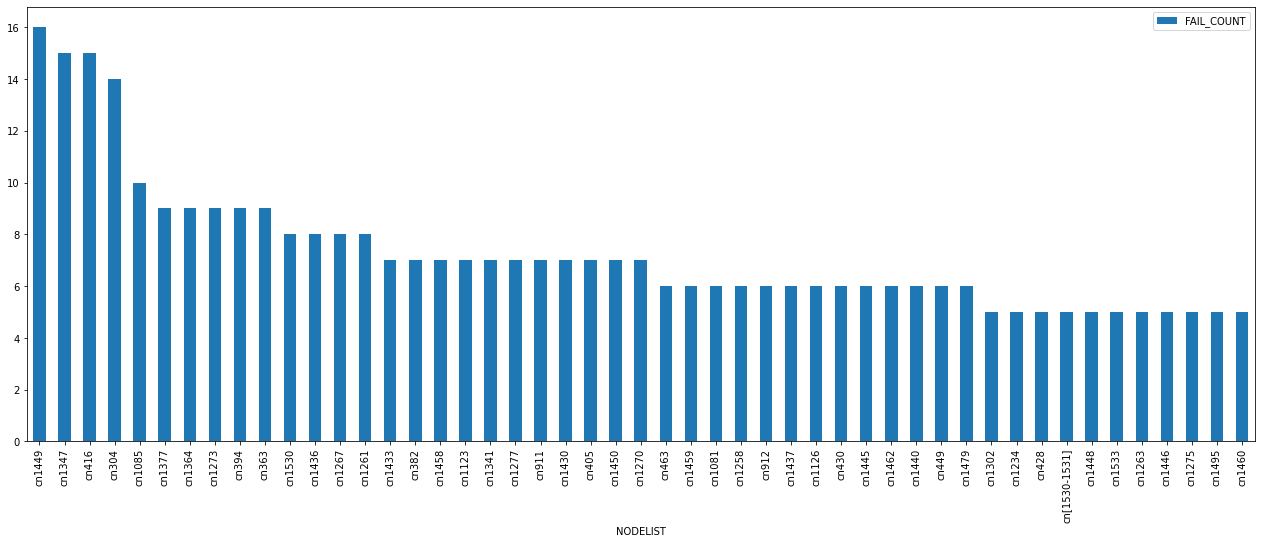

In [29]:
problem_nodes.plot(kind='bar',x='NODELIST', y='FAIL_COUNT', figsize=(22,8));

This is still quite a bit of nodes, so I decided to slice the data further, only taking the top 4 nodes. I chose this because cn304 had 14 failures, whereas cn1085 had 10. This is the biggest dropoff seen in the data.

In [30]:
big_problem_nodes = node_failure_df[node_failure_df['FAIL_COUNT']>10]
big_problem_nodes

,NODELIST,FAIL_COUNT
0,cn1449,16
1,cn1347,15
2,cn416,15
3,cn304,14


It's not fair to go purely by count since some nodes may be used more than others or used on harder jobs than others, so I decided to use %failed as well as compare memory useage.

In [31]:
#full_df.merge(node_failure_df, on='NODELIST')

In [32]:
total_jobs = full_df['NODELIST'].value_counts()

In [33]:
total_jobs_df = pd.DataFrame(total_jobs)

In [34]:
total_jobs_df

,NODELIST
cn1091,14320
cn1367,13432
cn304,13243
cn1321,12797
cn449,12148
...,...
cn[1508-1509],1
cn[459-460],1
cn[1271,1
cn[1228,1


In [35]:
total_jobs_df = total_jobs_df.reset_index()

In [36]:
total_jobs_df.columns = ['NODELIST','JOB_COUNT']

In [37]:
node_failure_df = node_failure_df.merge(total_jobs_df, on='NODELIST')

In [38]:
node_failure_df['PERCENT_FAILED'] = (node_failure_df['FAIL_COUNT'] / node_failure_df['JOB_COUNT']) *100

In [39]:
node_failure_df.sort_values('JOB_COUNT', ascending=False)

,NODELIST,FAIL_COUNT,JOB_COUNT,PERCENT_FAILED
52,cn1091,4,14320,0.027933
364,cn1367,1,13432,0.007445
3,cn304,14,13243,0.105716
36,cn449,6,12148,0.049391
2,cn416,15,12087,0.124100
...,...,...,...,...
363,cn[1389-1399],1,1,100.000000
361,cn[1467,1,1,100.000000
406,cn[432-433],1,1,100.000000
383,cn[359,1,1,100.000000


In [40]:
problem_nodes = node_failure_df[node_failure_df['JOB_COUNT']>50]

In [41]:
problem_nodes.sort_values('PERCENT_FAILED', ascending=False)

,NODELIST,FAIL_COUNT,JOB_COUNT,PERCENT_FAILED
205,cn1400,2,519,0.385356
255,cn1478,1,366,0.273224
9,cn363,9,4080,0.220588
1,cn1347,15,7628,0.196644
6,cn1364,9,4888,0.184124
...,...,...,...,...
316,cn1388,1,10250,0.009756
371,cn1292,1,10375,0.009639
306,cn1399,1,10486,0.009537
428,cn1121,1,10591,0.009442


'cn1449','cn1347','cn416','cn304' were the top 4 when looking purely at fail counts


cn1400, cn1478, cn363, cn1347 were the top 4 when looking at % of jobs failed

Since cn1347 shows up on both lists, it might be a node that is worth looking further into.
What I'd also like to look into is if these failures all occur on similar times/days or if they were spread out.

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,REQMEM_IDEN,REQMEM_NUM,USEDMEM_NUM
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,Mn,122880,65973.49
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,Mn,122880,67181.12
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,Mn,122880,69111.86
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,Mn,122880,65317.33
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,Mn,122880,65876.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813588,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,Mn,32768,30042.68
3813589,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,Mn,32768,31067.75
3813590,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,0:0,COMPLETED,cn368,Mn,32768,21207.96
3813591,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,0:0,RUNNING,cn1509,Mn,100000,NaN
